# Scipy

Модуль scipy содержит множество инструментов, предназначенных для научных вычислений. 

Его различные подмодули соответствуют различным областям применения таким как: интерполяция, оптимизация, обработка изображений, статистика, специальные функции и другие.

In [1]:
import numpy as np

In [2]:
import scipy

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# scipy.special

https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special

В математике есть набор функций, которые невозможно записать при помощи привычных нам функций (тригонометрических, логарифмов, экспонент и т.д.).

Такие функции можно только приближённо вычислять и модуль scipy.special предоставляет такую возможность.

Например, $erf(x) = \frac{2}{\sqrt{\pi}} \int\limits_{0}^{x} e^{-t^2} dt$ является такой функцией, но её можно вычислять в scipy.special

In [4]:
import scipy.special

In [5]:
scipy.special.erf(0.1)

0.1124629160182849

In [6]:
scipy.special.erf(0.2)

0.22270258921047845

Численно посчитаем производную в точке 0.2

In [7]:
(scipy.special.erf(0.2 +  0.0001) - scipy.special.erf(0.2)) / 0.0001

1.0841131010844163

И она совпадёт со значнением подынтегрального выражения в точке 0.2 

In [8]:
2. / np.sqrt(np.pi) * np.exp(- 0.2 ** 2)

1.084134787104863

Подробности можно прочитать в документации

### Выводы:
scipy позволяет вычислять сложные функции, которые нельзя легко выписать

# scipy.linalg

https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg

Линейная алгебра — раздел математики, изучающий объекты линейной природы: вектора, системы линейных уравнений,  матрицы. Среди основных инструментов, используемых в линейной алгебре — определители, матрицы, транспонирование. scipy.linalg посзволяет производить эти операции.

In [9]:
import scipy.linalg

Как вы думаете одно и то же или нет?

In [10]:
' '.join(sorted(dir(scipy.linalg))) == ' '.join(sorted(dir(np.linalg)))

False

Создадим матрицу

In [13]:
arr = np.array(
    [
        [1, 2],
        [3, 4]
    ]
)

In [14]:
arr

array([[1, 2],
       [3, 4]])

Может найти определитель этой матрицы.

Для матриц 2 на 2 он равен arr[0, 0] \* arr[1, 1] - arr[1, 0] \* arr[0, 1]

**Вопрос: чему равен $\det(ABC)$, а $\det A^T$, а $\det (-A)$?**

In [15]:
scipy.linalg.det(arr)

-2.0

In [16]:
arr[0, 0] * arr[1, 1] - arr[1, 0] * arr[0, 1]

-2

Можем найти обратную матрицу

Обратная матрица к матрице $A$, это такая матрица $B$,  что $A \times B = E$, а $E$ - это матрица, у которой везде кроме диагонали нули, а на диалогали единицы.

**Вопрос: как связаны $\det A$ и $\det A^{-1}$?**

In [17]:
inv_arr = scipy.linalg.inv(arr)

inv_arr

In [18]:
np.dot(arr, inv_arr)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

Не точные нули получаются из-за точности вычислений

Также можно решать линейные системы уравнений.

$2x + y + 3z = 9$

$x - 2y + z = -2$

$3x + 2y + 2z = 7$



Cоздадим соответсвующие массивы и матрицы

In [19]:
A = np.array([
    [2, 1, 3],
    [1, -2, 1],
    [3, 2, 2]
])

b = np.array([9, 2, 7])

Тогда система уравнений равносильна тому, что найти такой массив [x, y, z], что

np.dot(A, [x, y, z]) == b


**Вопрос: когда уравнение $Ax = b$ имеет единственное решение? просто имеет решения?**

In [20]:
solution = scipy.linalg.solve(A, b)

In [21]:
solution

array([0.23076923, 0.46153846, 2.69230769])

In [22]:
np.dot(A, solution)

array([9., 2., 7.])

Матрица должна быть обратима

In [23]:
A = np.array([
    [2, 1, 3],
    [2, 1, 3],
    [0, 0, 1]
])

b = np.array([1, 1, 1])

In [24]:
scipy.linalg.solve(A, b)

LinAlgError: Matrix is singular.

Можно считать длины векторов (значения массива можно считать координатами и тогда это будет вектор)

In [25]:
vec = np.array([0, 3, 4])

In [26]:
scipy.linalg.norm(vec) # sqrt(0 **2 + 3 ** 2 + 4 ** 2)

5.0

Соответсвенно расстояние между двумя точками будет считатся так

In [27]:
a = np.array([1, 5])
b = np.array([-3, 2])
scipy.linalg.norm(a - b)

5.0

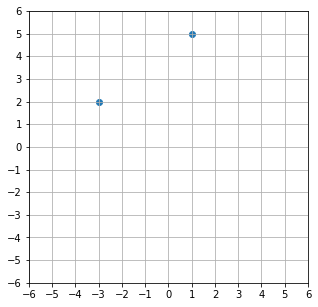

In [28]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(np.arange(-6, 7, 1))
ax.set_yticks(np.arange(-6, 7, 1))
plt.scatter([1, -3], [5, 2])
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()

In [29]:
def points_dist(fst_point, snd_point):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(np.arange(-6, 7, 1))
    ax.set_yticks(np.arange(-6, 7, 1))
    plt.scatter([fst_point[0], snd_point[0]], [fst_point[1], snd_point[1]])
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.grid()
    plt.plot([fst_point[0], snd_point[0]], [fst_point[1], snd_point[1]])
    print(scipy.linalg.norm(np.array(fst_point) - np.array(snd_point)))

5.0


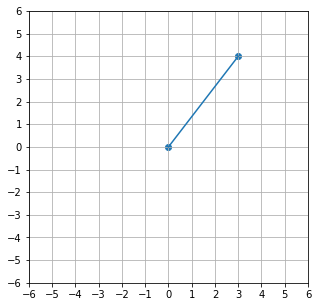

In [30]:
points_dist([0, 0], [3, 4])

13.0


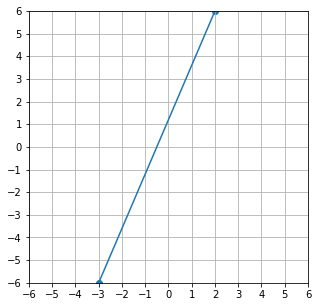

In [31]:
points_dist([-3, -6], [2, 6])

### Выводы:
scipy можно использовать для работы с матрицами и векторами

# scipy.optimize

https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize

При помощи scipy можно решать различные задачи оптимизации. scipy предоставляет целый набор различных методов оптимизации.

In [5]:
import scipy.optimize

Определим какую-нибудь функцию

In [33]:
def f(x):
    return x ** 2 + 10 * np.sin(x) + 4 * np.cos(x / 2.)

И нарисуем её график

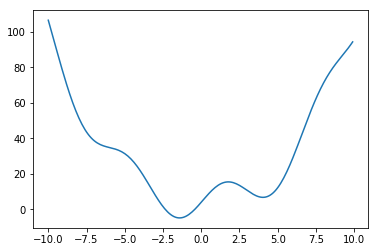

In [34]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show()

Мы видим локальный минимум в окрестности точки -1.5

scipy предоставляет общий способ нахождения минимума функции. Ему нужно передать саму функцию и начальное приближение, начиная с которого алгоритм будет искать минимум

In [35]:
res = scipy.optimize.fmin_bfgs(f, -5)[0]

Optimization terminated successfully.
         Current function value: -4.836722
         Iterations: 5
         Function evaluations: 27
         Gradient evaluations: 9


bfgs - название метода оптимизации

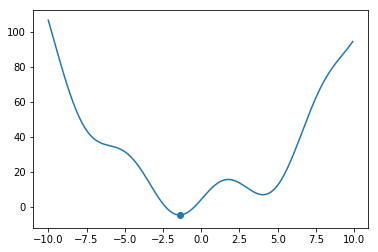

In [36]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.scatter([res], [f(res)])
plt.show()

Если выбрать неудачное начальное приближение, то возможно будет найден локальный, а не глобальный минимум

Optimization terminated successfully.
         Current function value: -4.836722
         Iterations: 5
         Function evaluations: 36
         Gradient evaluations: 12


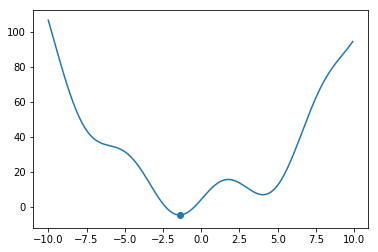

In [37]:
res = scipy.optimize.fmin_bfgs(f, -10)[0]
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.scatter([res], [f(res)])
plt.show()

Optimization terminated successfully.
         Current function value: 6.761126
         Iterations: 4
         Function evaluations: 15
         Gradient evaluations: 5


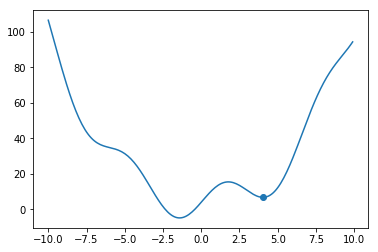

In [38]:
res = scipy.optimize.fmin_bfgs(f, 5)[0]
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.scatter([res], [f(res)])
plt.show()

Есть общий интерфейс для минимизации

In [39]:
scipy.optimize.minimize(f, 0)

      fun: -4.836722311515954
 hess_inv: array([[0.08990246]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([-1.41693693])

In [40]:
scipy.optimize.minimize(f, 5)

      fun: 6.761126303089426
 hess_inv: array([[0.09802786]])
      jac: array([-2.74181366e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([4.03513258])

### Выводы:
при помощи scipy можно оптимизировать произвольные функции

# Задача линейного программирования

Колхоз имеет возможность приобрести не более 19 трехтонных автомашин и не более 17 пятитонных. Отпускная цена трехтонного грузовика - 4000 руб., пятитонного - 5000 руб. Колхоз может выделить для приобретения автомашин 141 тысяч рублей. Сколько нужно приобрести автомашин, чтобы их суммарная грузоподъемность была максимальной?

$x$ - число трёхтонных машин

$y$ - число пятитонных машин

$4x + 5y$ - затраты на покупку машин в тысячах рублей

$3x + 5y$ - суммарная грузоподъёмность


Нужно решить задачу:

$3x + 5y \to max$

С ограничениями:

$0 \leq x \leq 19$

$0 \leq y \leq 17$

$4x + 5y \leq 141$

In [6]:
c = [-3, -5]
A_ub = [
    [4, 5],
    [1, 0],
    [0, 1]
]
b_ub = [
    141,
    19,
    17
]

scipy.optimize.linprog(c=c, A_ub=A_ub, b_ub=b_ub)

     fun: -127.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 5., 0.])
  status: 0
 success: True
       x: array([14., 17.])

Пусть теперь пятитонные и шеститонные грузовики

In [7]:
c = [-5, -6]
A_ub = [
    [4, 5],
    [1, 0],
    [0, 1]
]
b_ub = [
    141,
    19,
    17
]

scipy.optimize.linprog(c=c, A_ub=A_ub, b_ub=b_ub)

     fun: -173.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0., 0., 4.])
  status: 0
 success: True
       x: array([19., 13.])

### Машинное обучение это тоже оптимизация

Давайте напишем класс, который будеть искать линейную зависимость методом наименьших квадратов

$\sum_{i=1}^n (<w, x_i> - y_i)^2 \to \min_{w}$

заодно узнаем как писать свои классы :)

In [11]:
class LinearModel(object): # наследуемся от object – стандартная практика
    def __init__(self, loss_function): # конструктор имеет название __init__ и первым аргументом всегда имеет self
        self.loss_function = loss_function
        
    def fit(self, X_data, y_data):
        """
        тут можно написать документацию метода
        X - это выборка признаков, y - выборка целевых переменных
        """
        # пока сделаем реализацию через scipy.optimize
        
        def func(weights):
            return np.sum(self.loss_function(np.dot(X_data, weights[1:]) + weights[0] - y_data))
        
        self.weights = scipy.optimize.minimize(func, np.ones(X_data.shape[1] + 1)).x
        return self
        
    def predict(self, X_data):
        return np.dot(X_data, self.weights[1:]) + self.weights[0]

Генерируем данные

In [8]:
X_data = np.random.uniform(0, 10, size=50)
y_data = X_data * 0.5 + 7 + np.random.uniform(-1, 1, size=len(X_data))

И визуализируем их

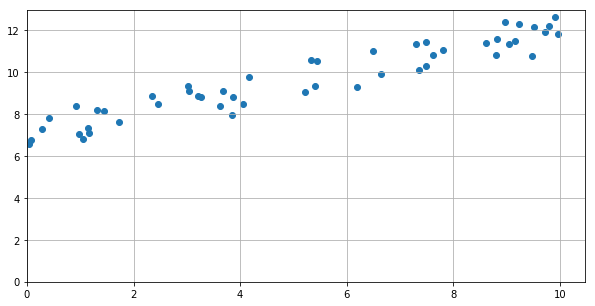

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(X_data, y_data)
plt.ylim(0)
plt.xlim(0)
plt.grid()
plt.show()

Далее обучаем модель

In [12]:
model = LinearModel(lambda arr: np.abs(arr)).fit(X_data[:, np.newaxis], y_data)

И визуализируем её

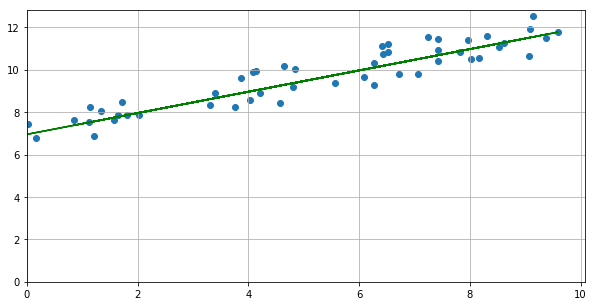

In [47]:
plt.figure(figsize=(10, 5))
plt.scatter(X_data, y_data)
plt.plot(X_data, model.predict(X_data[:, np.newaxis]), c='green')
plt.ylim(0)
plt.xlim(0)
plt.grid()
plt.show()

Объединим всё в одну функцию чтобы было проще рисовать

In [48]:
def plot_example(error_size=1, loss_function=None, outliers_num=0):
    if loss_function is None:
        loss_function = lambda arr: arr ** 2
    
    X_data = np.random.uniform(0, 10, size=50)
    y_data = X_data * 0.5 + 7 + np.random.uniform(-error_size, error_size, size=len(X_data))
    
    if outliers_num > 0:
        X_out = 1 + np.random.uniform(-0.7, 0.7, size=outliers_num)
        y_out = 20 + np.random.uniform(-0.7, 0.7, size=outliers_num)
        X_data = np.concatenate((X_data, X_out))
        y_data = np.concatenate((y_data, y_out))
    
    model = LinearModel(loss_function).fit(X_data[:, np.newaxis], y_data)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X_data, y_data)
    plt.plot(X_data, model.predict(X_data[:, np.newaxis]), c='green')
    plt.ylim(0)
    plt.xlim(0)
    plt.grid()
    plt.show()

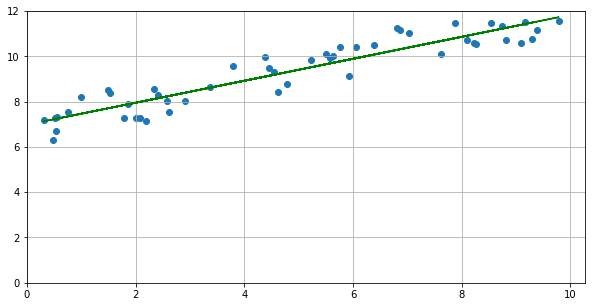

In [49]:
plot_example(1, lambda arr: arr ** 2)

Вроде всё хорошо, но добавим выбросы?

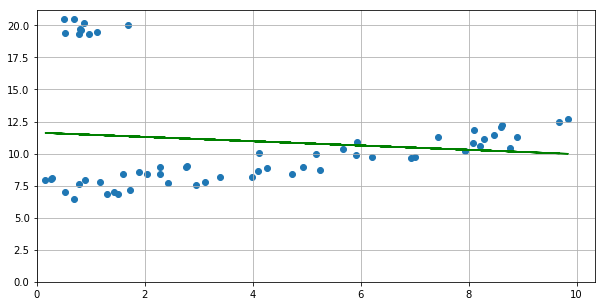

In [50]:
plot_example(1, lambda arr: arr ** 2, outliers_num=10)

Линия ушла вверх и покосилась, почему так получается? Давайте заменим функцию потрель на модуль? Ну так, чисто по фану

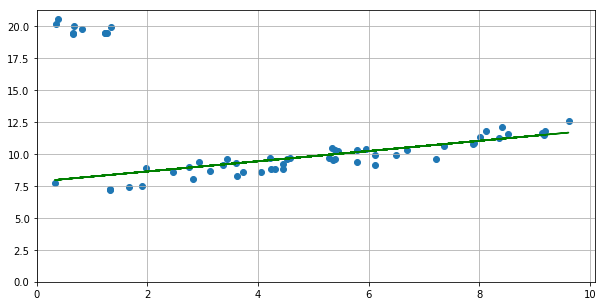

In [51]:
plot_example(1, lambda arr: np.abs(arr), outliers_num=10)

Внезапно заработало, почему так? Обязательно расскажем на занятии про метрики, а пока можете попробовать сами обосновать

### Мы же крутые ребята, правда? Зачем нам пользоваться scipy.optimize для квадратичной функции потерь, если мы можем просто вывести формулу оптимального решения!

Пусть $X$ - матрица признаков, $w$ – веса признаков, $w_0$ – свободный коэффициент, $y$ – вектор целевых переменных.

Наша цель – решить оптимизационную задачу:
$||X w + y||^2 \to \min_{w} $

$$ 0 = \frac{\partial{}}{\partial{w}}||X w + y||^2 = 2X^TXw + 2 X^T y \implies $$
$$ w = (X^TX)^{-1} X^T y$$


In [52]:
class CoolModel(object):

    def fit(self, X_data, y_data):
        X_modified = np.hstack((
            np.ones((X_data.shape[0], 1)), 
            X_data
        ))
        self.weights = np.dot(
            np.linalg.inv(np.dot(X_modified.T, X_modified)), 
            np.dot(X_modified.T, y_data)
        )
        return self
        
    def predict(self, X_data):
        return np.dot(X_data, self.weights[1:]) + self.weights[0]

In [64]:
print(np.newaxis)

None


In [53]:
model = CoolModel().fit(X_data[:, np.newaxis], y_data)
print(model.weights)

[7.09882342 0.49542063]


In [54]:
model = LinearModel(lambda arr: arr ** 2).fit(X_data[:, np.newaxis], y_data)
print(model.weights)

[7.09882358 0.4954206 ]


Лол, она похоже работает. А по времени что получается?

In [55]:
%timeit CoolModel().fit(X_data[:, np.newaxis], y_data)

28.6 µs ± 406 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [56]:
%timeit LinearModel(lambda arr: arr ** 2).fit(X_data[:, np.newaxis], y_data)

488 µs ± 3.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Хм, иногда уметь в математику лучше чем писать велосипед

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
%timeit LinearRegression().fit(X_data[:, np.newaxis], y_data)

240 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Даже лучше sklearn-a!!!

Не, правда лучше :) Но совершенно не гибко и нельзя менять функции потерь, а в асолютах эти разницы не столь велики, чтобы за них бороться

In [59]:
X_data = np.random.uniform(0, 10, size=50000)
y_data = X_data * 0.5 + 7 + np.random.uniform(-1, 1, size=len(X_data))

In [60]:
%timeit CoolModel().fit(X_data[:, np.newaxis], y_data)

734 µs ± 86.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [61]:
%timeit LinearModel(lambda arr: arr ** 2).fit(X_data[:, np.newaxis], y_data)

7.76 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
%timeit LinearRegression().fit(X_data[:, np.newaxis], y_data)

971 µs ± 185 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
